# Read-me

- In the last notebook we observe we can classify data as a fraud. 
- In this notebook, we are creating dummy classifiers to use as baselines to compare with our morel.
- We will apply classical models as decision tree, random forests, logistic regressor. 
- We also will build a rule based model as in fraud detection is common to create.
- We will apply the baselines in raw features, without feature engineering.
- We train the models and after, we will save the predictions for the test set for an analysis in another notebook.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report,confusion_matrix
from lib.utils import *
from sklearn.model_selection import train_test_split

# Load data

In [71]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/kevintakano/miniconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [72]:
df = pd.read_csv('data/data.csv',sep=';')
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000,"4884,61",63500,"2122,83",10,13,0,35,11,0,0
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800,1800,3600,0,0,2,0,0,11,0,0
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,"159,9","104,9","209,8","77,78",0,2,0,14,11,0,0
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600,600,1800,0,0,3,0,18,11,0,0
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941,"1764,6",8823,"657,63",2,5,0,65,12,0,0


# Sample input

In [73]:
feats = list(df.columns[2:-1])
# feats

In [74]:
df['tipo_doc'] = df.tipo_doc.astype('category').cat.codes

In [75]:

df = change_portuguese_to_english_cols(df)

In [76]:
X = df[feats].values
y = df.fraude.values

In [77]:
companys = df.company_id
company_train, company_test = train_test_split(companys, test_size=0.30, random_state=42)

In [78]:
X_train = df[df.company_id.isin(company_train)][feats]
y_train = df[df.company_id.isin(company_train)]['fraude']

In [79]:
X_test = df[df.company_id.isin(company_test)][feats]
y_test = df[df.company_id.isin(company_test)]['fraude']

In [80]:
np.save("data/input/company_train.npy",company_train)
np.save("data/input/company_test.npy",company_test)
np.save("data/input/feats.npy",feats)

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

# Baselines

- Below, we train and evaluate in valid dataset.
- We focused in observing recall and precision for the fraud class (when class=1).
- We also observe ROCAUC and average-precision because it's good for imbalanced datasets.
- For the rule based models, we use the value 6 as we in the graphs from EDA shows reasonable to separate the class.

##  DecisionTree

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


clf = DecisionTreeClassifier(random_state=0)

In [83]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [84]:
print_results_model(y_valid, clf, X_valid)

Classification report:
              precision    recall  f1-score   support

           0     0.9416    0.9416    0.9416       685
           1     0.6774    0.6774    0.6774       124

    accuracy                         0.9011       809
   macro avg     0.8095    0.8095    0.8095       809
weighted avg     0.9011    0.9011    0.9011       809

ROC AUC Score:
	 0.8095
Average precision-recall score:
	 0.5083


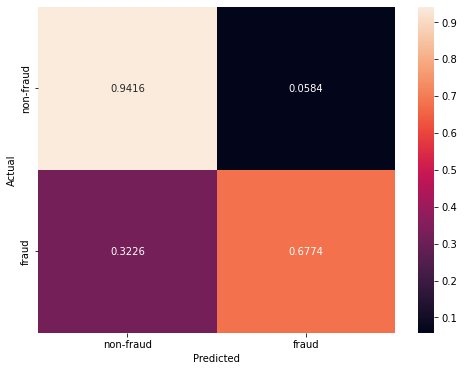

In [85]:
plot_confusion_matrix_model(y_valid, clf, X_valid)

In [86]:
y_pred = clf.predict_proba(X_test)[:,1]

In [87]:
np.save("data/input/y_pred_decision_tree.npy",y_pred)

##  RandomForest

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


clf = RandomForestClassifier(random_state=0)

In [89]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [90]:
print_results_model(y_valid, clf, X_valid)

Classification report:
              precision    recall  f1-score   support

           0     0.9520    0.9547    0.9534       685
           1     0.7459    0.7339    0.7398       124

    accuracy                         0.9209       809
   macro avg     0.8489    0.8443    0.8466       809
weighted avg     0.9204    0.9209    0.9206       809

ROC AUC Score:
	 0.9599
Average precision-recall score:
	 0.5882


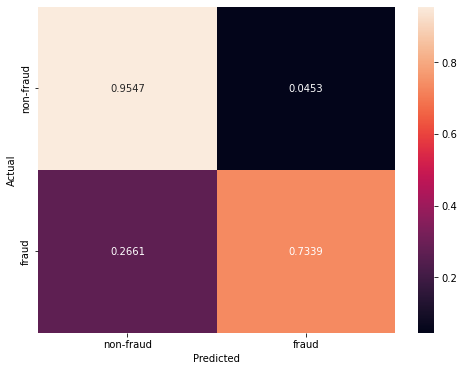

In [91]:
plot_confusion_matrix_model(y_valid, clf, X_valid)

In [92]:
y_pred = clf.predict_proba(X_test)[:,1]

In [93]:
np.save("data/input/y_pred_random_forest.npy",y_pred)

## Logistic Regressor

In [94]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/home/kevintakano/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
print_results_model(y_valid, clf, X_valid)

Classification report:
              precision    recall  f1-score   support

           0     0.9098    0.8978    0.9037       685
           1     0.4737    0.5081    0.4903       124

    accuracy                         0.8381       809
   macro avg     0.6917    0.7029    0.6970       809
weighted avg     0.8429    0.8381    0.8404       809

ROC AUC Score:
	 0.9034
Average precision-recall score:
	 0.3161


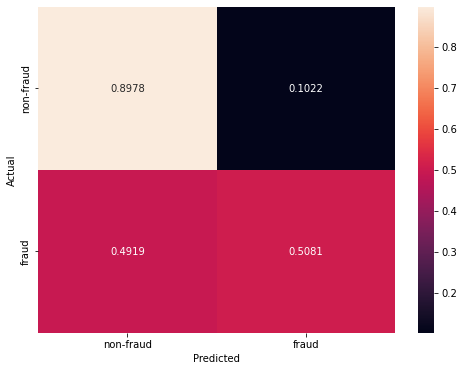

In [96]:
plot_confusion_matrix_model(y_valid, clf, X_valid)

In [97]:
y_pred = clf.predict_proba(X_test)[:,1]

In [98]:
np.save("data/input/y_pred_logistic_regression.npy",y_pred)

## Rule based baseline Model

In [99]:
from math import log


In [100]:
avg_valor_log  =  np.array(list(map(lambda x: log(x), X_valid['avg_valor_boleto'])))

baseline = (avg_valor_log > 6).astype(int)
# baseline

In [101]:
print_results(y_valid, baseline)

Classification report:
              precision    recall  f1-score   support

           0     0.9915    0.6818    0.8080       685
           1     0.3550    0.9677    0.5195       124

    accuracy                         0.7256       809
   macro avg     0.6733    0.8247    0.6637       809
weighted avg     0.8940    0.7256    0.7637       809

ROC AUC Score:
	 0.8247
Average precision-recall score:
	 0.3485


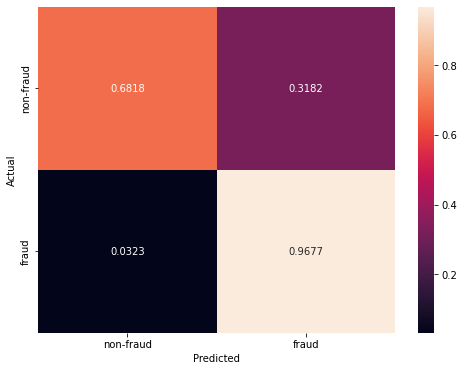

In [102]:
plot_confusion_matrix(y_valid, baseline)

In [103]:
avg_valor_log  =  np.array(list(map(lambda x: log(x), X_test['avg_valor_boleto'])))

baseline = (avg_valor_log > 6).astype(int)

In [105]:
np.save("data/input/y_pred_rule.npy",baseline)